Teste de Hipóteses

H0 - hipótese a ser testar (verdadeira até que se prove o contrário)

H1 - hipótese alternativa

Método Estatístico para o Teste de Hipóteses:
1. Determinar o parâmetro de interesse (média, proporção, variância, etc).
2. Definir a hipótese a ser testada (H0).
3. Definir a hipótese alternativa (H1).
4. Calcular o valor a ser comparado utilizando a estatística de teste apropiada.
5. Delimitar a região de rejeição, valor crítico para comparar o valor anterior.
6. Comparar os valores obtidos.
7. Decidir pela rejeição ou aceitação da hipótese H0.
8. Concluir, basendo-se na aceitação ou rejeição da hipótese H0.

In [104]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [10]:
# População: largura média = 10mm ; desvio padrão = 2 mm
# Amostra: N = 15; largura média = 8,5 mm ; nível de confiança = 95%
print("Aceitar o lote?")
print("Parâmetro de interesse: largura média do lote de parafusos")
print("Hipótese inicial: largura média do lote de parafusos = 10mm")
print("Hipótese alternativa: largura média do lote de parafusos <> 10mm")
print('Definição da estadística de teste: Z_calc = (x_barra - mu)/(sigma/sqrt(n))')
print('Delimitação da região de rejeição: Z_calc < -Z_alpha/2 ou Z_calc > Z_alpha/2')
Z_crit = stats.norm.ppf(0.975)
print('Z_crit = ', Z_crit)
print('Aplicar a estadística de teste: Z_calc')
x_barra = 8.5
mu = 10
sigma = 2
n = 15
Z_calc = (x_barra - mu)/(sigma/np.sqrt(n))
print('Z_calc = ', Z_calc)
print('Decidir pela rejeição ou aceitação da hipótese H0')
print('Como mod(Z_calc) > mod(Z_crit), rejeita-se H0')
print('Conclusão: a largura média do lote de parafusos é diferente de 10mm')
print('O lote não pode ser certificado')

Aceitar o lote?
Parâmetro de interesse: largura média do lote de parafusos
Hipótese inicial: largura média do lote de parafusos = 10mm
Hipótese alternativa: largura média do lote de parafusos <> 10mm
Definição da estadística de teste: Z_calc = (x_barra - mu)/(sigma/sqrt(n))
Delimitação da região de rejeição: Z_calc < -Z_alpha/2 ou Z_calc > Z_alpha/2
Z_crit =  1.959963984540054
Aplicar a estadística de teste: Z_calc
Z_calc =  -2.904737509655563
Decidir pela rejeição ou aceitação da hipótese H0
Como mod(Z_calc) > mod(Z_crit), rejeita-se H0
Conclusão: a largura média do lote de parafusos é diferente de 10mm
O lote não pode ser certificado


In [28]:
print('H0: Novo processo ')
print('H1: ')
mu = 75
sigma = 9
n = 25
sigma_x_barra = sigma/np.sqrt(n)
posicao_normal = (73-mu)/sigma_x_barra
print('posicao_normal = ', posicao_normal)
alpha = stats.norm.cdf(posicao_normal)
print('alpha = ', alpha)

H0: Novo processo 
H1: 
posicao_normal =  -1.1111111111111112
alpha =  0.13326026290250537


In [34]:
mu = 15
sigma = 2.6
n = 13
x_barra_amostral = 16.4
print('H0: mu = 15')
print('H1: mu > 15')
print('Nível de confiança: 95%')
Z_calc = (x_barra_amostral - mu)/(sigma/np.sqrt(n))
print('Z_calc = ', Z_calc)
Z_crit = stats.norm.ppf(0.95)
print('Z_crit = ', Z_crit)
print('Como Z_calc > Z_crit, rejeita-se H0')

H0: mu = 15
H1: mu > 15
Nível de confiança: 95%
Z_calc =  1.9414506867883
Z_crit =  1.6448536269514722
Como Z_calc > Z_crit, rejeita-se H0


#### Teste de Hipóteses para Média com Variância Desconhecida
Estatística de Teste: t de Student
t_calc = (x_barra - μ0) / (s / √n)

In [41]:
n = 21 # corpos de prova (Teste de Charpy)
x_barra = 73.1 # mils
S_x = 5.9 # mils
print('Intervalor de confiança = 99%')
print('Pode-se afirmar que a expansão máxima é de 75 mils?')
print('H0: mu0 = 75')
print('H1: mu0 < 75')
t_calc = (x_barra - 75)/(S_x/np.sqrt(n))
print('t_calc = ', t_calc)
t_crit = stats.t.ppf(0.01, df = n-1)
print('t_crit = ', t_crit)
print('Como t_calc > t_crit, mantém-se H0')

Intervalor de confiança = 99%
Pode-se afirmar que a expansão máxima é de 75 mils?
H0: mu0 = 75
H1: mu0 < 75
t_calc =  -1.4757447153247663
t_crit =  -2.5279770027405464
Como t_calc > t_crit, mantém-se H0


In [53]:
tempo_antes_treinamento = np.array([80, 72, 65, 78, 85])
tempo_depois_treinamento = np.array([75, 70, 60, 72, 78])
diferenca = tempo_depois_treinamento - tempo_antes_treinamento
print('Pergunta: considerando o nível de confiança de 90%, pode-se afirmar que o treinamento foi efetivo?')
print('Parâmetro de Interesse: diferença no tempo de execução das atividades')
print('H0: mu = 0')
print('H1: mu < 0')
t_calc = (diferenca.mean() - 0)/(diferenca.std(ddof = 1)/np.sqrt(len(diferenca)))
print('t_calc = ', t_calc)
t_crit = stats.t.ppf(0.1, df = len(diferenca)-1)
print('t_crit = ', t_crit)
print('Como t_calc < t_crit, rejeita-se H0')
print('Existem evidências de que o treinamento foi efetivo')

Pergunta: considerando o nível de confiança de 90%, pode-se afirmar que o treinamento foi efetivo?
Parâmetro de Interesse: diferença no tempo de execução das atividades
H0: mu = 0
H1: mu < 0
t_calc =  -5.976143046671969
t_crit =  -1.5332062737131436
Como t_calc < t_crit, rejeita-se H0
Existem evidências de que o treinamento foi efetivo


####  Videoaula 7- Teste de hipótese e Previsão da resposta 

In [87]:
df_cars = pd.read_csv('carst.csv')
slope, intercept, r_value, p_value, std_err = stats.linregress(df_cars['cap_vol'], df_cars['consumo'])
print('H0: beta1 = 0')
print('H1: beta1 <> 0')
print('Limite de confiança: 95%')
n = len(df_cars['cap_vol'])
t_student = stats.t.ppf(0.975, df = n-2)
print('t_student = ', t_student)
t_calc = slope/std_err
print('t_calc = ', t_calc)
print('Como t_calc > t_student, rejeita-se H0')
S_yy = ((df_cars['consumo'] - df_cars['consumo'].mean())**2).sum()
S_xy = ((df_cars['cap_vol'] - df_cars['cap_vol'].mean())*(df_cars['consumo'] - df_cars['consumo'].mean())).sum()
SQE = S_yy - slope*S_xy
s = np.sqrt(SQE/(n-2))
x_medio = df_cars['cap_vol'].mean()
S_xx = ((df_cars['cap_vol'] - x_medio)**2).sum()
print('\nH0: beta0 = 0')
print('H1: beta0 <> 0')
print('Limite de confiança: 95%')
t_student = stats.t.ppf(0.975, df = n-2)
print('t_student = ', t_student)
t_calc = intercept/(s*np.sqrt(1/n + x_medio**2/S_xx))
print('t_calc = ', t_calc)
print('Como t_calc > t_student, rejeita-se H0\n')
s_beta_0 = s*np.sqrt(1/n + x_medio**2/S_xx)
print('Intervalo de confiança de beta_0 = ', intercept, '+/-', t_student * s_beta_0)
print('Intervalo de confiança de beta_0 = (', intercept-t_student * s_beta_0, ',', intercept + t_student * s_beta_0, ')\n')

x_definido = 3500
y_esperado = intercept + slope*x_definido
print("Y esperado = ", y_esperado)
s_y_esperado = s*np.sqrt(1/n + (x_definido - x_medio)**2/S_xx)
print('S_y_esperado = ', s_y_esperado)
print('Intervalo de confiança de Y_esperado = ', y_esperado, '+/-', t_student * s_y_esperado)
print('Intervalo de confiança de Y_esperado = (', y_esperado-t_student * s_y_esperado, ',', y_esperado + t_student * s_y_esperado, ')\n')

print('Cálculo de Intervalo de Previsão (IP)')
print('Intervalo de Previsão = ', y_esperado, '+/-', t_student * np.sqrt(s**2 - s_y_esperado**2))
print('Intervalo de Previsão = (', y_esperado-t_student * np.sqrt(s**2 - s_y_esperado**2), ',', y_esperado + t_student * np.sqrt(s**2 - s_y_esperado**2), ')\n')

H0: beta1 = 0
H1: beta1 <> 0
Limite de confiança: 95%
t_student =  2.055529438642871
t_calc =  -11.398386036724396
Como t_calc > t_student, rejeita-se H0

H0: beta0 = 0
H1: beta0 <> 0
Limite de confiança: 95%
t_student =  2.055529438642871
t_calc =  28.435146128650263
Como t_calc > t_student, rejeita-se H0

Intervalo de confiança de beta_0 =  12.144010117932384 +/- 0.8778703013393584
Intervalo de confiança de beta_0 = ( 11.266139816593025 , 13.021880419271742 )

Y esperado =  7.426549108021181
S_y_esperado =  0.2444424514429591
Intervalo de confiança de Y_esperado =  7.426549108021181 +/- 0.502458654995033
Intervalo de confiança de Y_esperado = ( 6.924090453026148 , 7.929007763016214 )

Cálculo de Intervalo de Previsão (IP)
Intervalo de Previsão =  7.426549108021181 +/- 2.531389743331841
Intervalo de Previsão = ( 4.89515936468934 , 9.957938851353022 )



In [91]:
print('Exercício - Semana 3 - Quiz da Videoaula 7 - Teste de hipótese e previsão da resposta')
x_preditor = 4000
y_esperado = intercept + slope*x_preditor
print('Y_esperado = ', y_esperado)
s_y_esperado = s*np.sqrt(1/n + (x_preditor - x_medio)**2/S_xx)
print('S_y_esperado = ', s_y_esperado)
print('Intervalo de confiança de Y_esperado = ', y_esperado, '+/-', t_student * s_y_esperado)
print('Intervalo de confiança de Y_esperado = (', y_esperado-t_student * s_y_esperado, ',', y_esperado + t_student * s_y_esperado, ')\n')

Exercício - Semana 3 - Quiz da Videoaula 7 - Teste de hipótese e previsão da resposta
Y_esperado =  6.7526261066052955
S_y_esperado =  0.2649476476659226
Intervalo de confiança de Y_esperado =  6.7526261066052955 +/- 0.544607689476483
Intervalo de confiança de Y_esperado = ( 6.208018417128812 , 7.297233796081779 )



#### Modelagem e inferência - Teste de hipótese e Previsão da resposta: Exemplos
https://www.youtube.com/watch?v=PhQECty8ehU

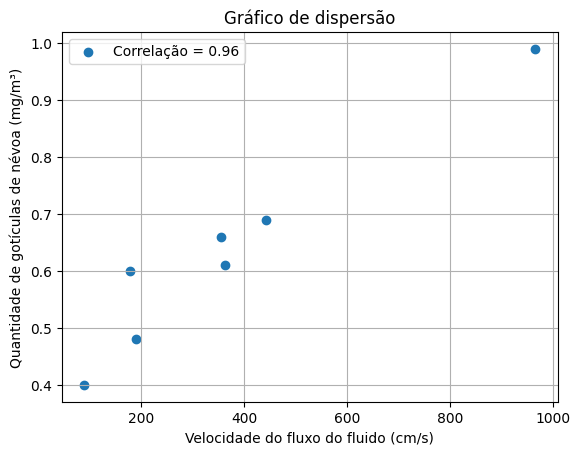

In [98]:
x = np.array([89, 177, 189, 354, 362, 442, 965])
y = np.array([0.4, 0.6, 0.48, 0.66, 0.61, 0.69, 0.99])
plt.scatter(x, y, label = f'Correlação = {np.corrcoef(x, y)[0,1]:.2f}')
plt.xlabel('Velocidade do fluxo do fluido (cm/s)')
plt.ylabel('Quantidade de gotículas de névoa (mg/m³)')
plt.title('Gráfico de dispersão')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept, r_value, p_value, std_err)

0.000621075835066793 0.4041237853139725 0.9647280228801394 0.0004403239216466288 7.579156202786863e-05


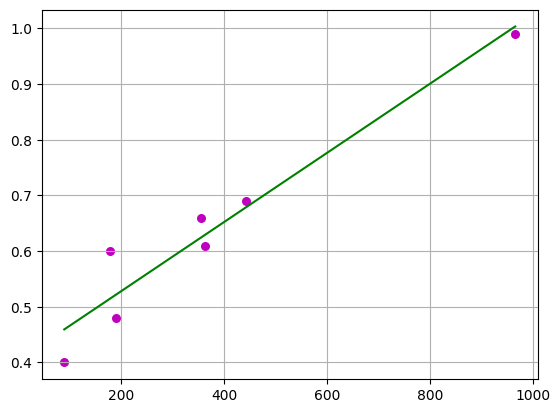

In [100]:
yp = intercept + slope*x
plt.plot(x, yp, color = 'g')
plt.scatter(x, y, color = 'm', marker='o', s = 30)
plt.grid(True)
plt.show()

In [105]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     67.15
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           0.000440
Time:                        02:45:43   Log-Likelihood:                 11.671
No. Observations:                   7   AIC:                            -19.34
Df Residuals:                       5   BIC:                            -19.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4041      0.035     11.684      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [115]:
x = np.array([89, 177, 189, 354, 362, 442, 965])
y = np.array([0.4, 0.6, 0.48, 0.66, 0.61, 0.69, 0.99])
x_medio = x.mean()
y_medio = y.mean()
S_x = x.sum()
S_y = y.sum()
S_xy = (x*y).sum()
S_x2 = (x**2).sum()
S_y2 = (y**2).sum()
S_xx = ((x - x_medio)**2).sum()
S_yy = ((y - y_medio)**2).sum()
S_xy = ((x - x_medio)*(y - y_medio)).sum()
beta_1 = S_xy/S_xx
beta_0 = y_medio - beta_1*x_medio

# Calcular SQE, SQT e SQR
SQE = S_yy - beta_1*S_xy
SQT = S_yy
SQR = SQT - SQE

# Calcular R2
r2 = 1 - SQE/SQT

# Calcular varância estimada (s2)
s2 = SQE/(len(x)-2)
# Calcular desvio padrão estimado (s)
s = np.sqrt(s2)
# Calcular erro padrão (e_beta)
e_beta = s/np.sqrt(S_xx)

print('beta_0 = ', beta_0)
print('beta_1 = ', beta_1)
print(S_x, S_y, S_xy)
print(S_x2, S_y2)
print(S_xx, S_yy, S_xy)
print('Coeficiente de Correlação = ', r_value)
print(SQE, SQT, SQR)
print('s2 = ', s2)
print('s = ', s)
print('R2 = ', r2)
print('e_beta = ', e_beta)

beta_0 =  0.40412378531397253
beta_1 =  0.0006210758350667929
2578 4.43 315.8042857142857
1457920 3.0142999999999995
508479.42857142864 0.21074285714285712 315.8042857142857
Coeficiente de Correlação =  0.9647280228801394
0.014604446675185095 0.21074285714285712 0.19613841046767203
s2 =  0.0029208893350370193
s =  0.05404525265957241
R2 =  0.9307001581302226
e_beta =  7.579156202786868e-05


In [117]:
print('H0: beta_1 =0.6/900')
print('H1: beta_1 < 0.6/900')
print('Nível de confiança: 95%')
t_crit = stats.t.ppf(0.975, df = len(x)-2)
print('t_crit = ', t_crit)

H0: beta_1 =0.6/900
H1: beta_1 < 0.6/900
Nível de confiança: 95%
t_crit =  2.5705818366147395


In [118]:
t_calc = (beta_1 - 0.6/900)/e_beta
print('t_calc = ', t_calc)

t_calc =  -0.601529119865744


In [119]:
# Calcular intervalo de confiança de beta_1
beta_1_inferior = beta_1 - t_crit*e_beta
beta_1_superior = beta_1 + t_crit*e_beta
print('Intervalo de confiança de beta_1 = (', beta_1_inferior, ',', beta_1_superior, ')')

Intervalo de confiança de beta_1 = ( 0.00042624742234929425 , 0.0008159042477842915 )


In [123]:
y_pred = model.predict()
print(y_pred)

[0.45939953 0.51405421 0.52150712 0.62398463 0.62895324 0.6786393
 1.00346197]


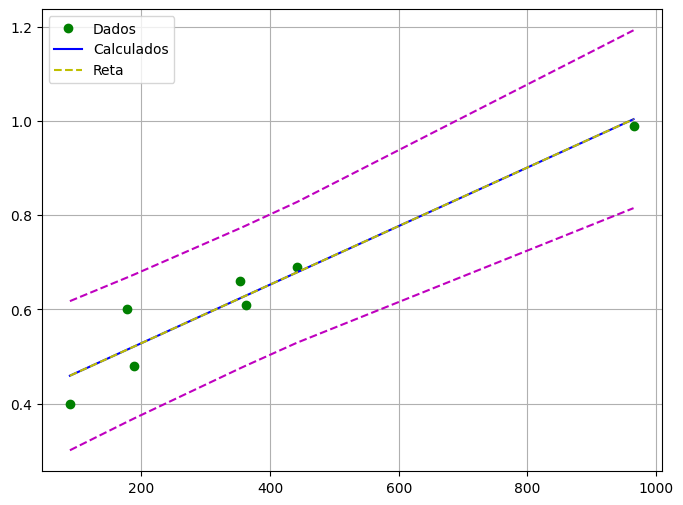

In [124]:
pred_ols = model.get_prediction()
iv_l = pred_ols.summary_frame()['obs_ci_lower']
iv_u = pred_ols.summary_frame()['obs_ci_upper']

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'go', label='Dados')
ax.plot(x, y_pred, 'b-', label='Calculados')
ax.plot(x, model.fittedvalues, 'y--', label='Reta')
ax.plot(x, iv_u, 'm--')
ax.plot(x, iv_l, 'm--')
ax.legend(loc='best')
plt.grid(True)
plt.show() 

In [126]:
print('H0: beta_1 = -0,05')
print('H1: beta_1 > -0,05')

print('Limite de confiança = 99%')
n = 18
t_crit = stats.t.ppf(0.995, df = n-2)
print('t_crit = ', t_crit)

H0: beta_1 = -0,05
H1: beta_1 > -0,05
Limite de confiança = 99%
t_crit =  2.9207816223499967


In [127]:
beta_1_0 = -0.05
s_beta_1 = 0.09923
beta_1 = -0.07468
t_calc = (beta_1 - beta_1_0)/s_beta_1
print('t_calc = ', t_calc)

t_calc =  -0.24871510631865357


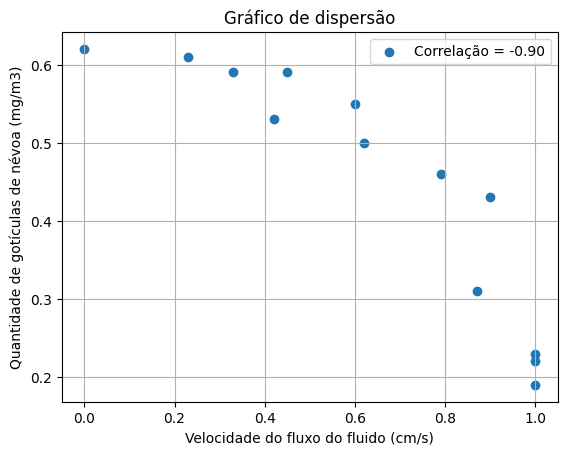

In [131]:
x = np.array([0, 0.42, 0.23, 0.33, 0.62, 0.60, 0.45, 0.87, 0.90, 0.79, 1, 1, 1])
y = np.array([0.62, 0.53, 0.61, 0.59, 0.50, 0.55, 0.59, 0.31, 0.43, 0.46, 0.23, 0.22, 0.19])
plt.scatter(x, y, label = f'Correlação = {np.corrcoef(x, y)[0,1]:.2f}')
plt.xlabel('Velocidade do fluxo do fluido (cm/s)')
plt.ylabel('Quantidade de gotículas de névoa (mg/m3)') 
plt.title('Gráfico de dispersão')
plt.legend()
plt.grid(True)
plt.show()


In [136]:
x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
print(modelo.summary())
x

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     44.43
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           3.53e-05
Time:                        03:26:19   Log-Likelihood:                 16.530
No. Observations:                  13   AIC:                            -29.06
Df Residuals:                      11   BIC:                            -27.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.046     15.753      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


array([[1.  , 0.  ],
       [1.  , 0.42],
       [1.  , 0.23],
       [1.  , 0.33],
       [1.  , 0.62],
       [1.  , 0.6 ],
       [1.  , 0.45],
       [1.  , 0.87],
       [1.  , 0.9 ],
       [1.  , 0.79],
       [1.  , 1.  ],
       [1.  , 1.  ],
       [1.  , 1.  ]])